18.12.2025 İGÜ SEM OTONOM EĞİTİMİ
  
  ABDULLAH EMİN BAYRAM

  PHYTON-GOOGLE-COLAP-VERİ-VE-ALGORİTMA-KODLARI   



Yapay zeka modeli oluşturmada aşamalar

In [24]:
# TensorFlow kütüphanesinin sisteme dahil edilmesi ve veri setinin işleme alınması

!pip3 install pydot
!apt-get install graphviz
!pip3 install tensorflow

# Bu iki kütüphane ile oluşturulan yapay zeka modelinin yapısını çıktı alabileceğiz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [29]:
model = models.Sequential ([ # Modeli oluşturma ])
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')


SyntaxError: '[' was never closed (ipython-input-4271203210.py, line 1)

In [30]:
# Test seti üzerinde modelin performansını değerlendirme

hata_oranı, basarı_oranı = model.evaluate(x_test, y_test, verbose=2)

print(" Modelin Doğruluk Oranı: %", 100*basarı_oranı)
print(" Modelin Hata Oranı: %", (100-100*basarı_oranı))


AttributeError: 'LinearRegression' object has no attribute 'evaluate'

Modelin eğitim süreci


In [26]:
model.compile(optimizer='adam', # Modeli derleme
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

AttributeError: 'LinearRegression' object has no attribute 'compile'

In [31]:
el.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_Model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı
# sistemin hata verebileceği en temel noktadır. İşlemlerde dikkat!!!

NameError: name 'el' is not defined

In [27]:
model.fit(x_train, y_train, epochs=5) # Modeli Eğitilmesi Adımı

# Modeli görselleştirmek ve çalışma alanına kaydetmek için plot_model kullanımı
plot_model(model, to_file='YZ_Model/yz_tensoflow_model_ciktisi.png', show_shapes=True, show_layer_names=True) # Modelin Çıktısı
# sistemin hata verebileceği en temel noktadır. İşlemlerde dikkat!!!

NameError: name 'x_train' is not defined

In [21]:
# CPU ve GPU teknolojisinin kullanımına göre olması gereken veri sayısı tablosu

import pandas as pd

tablo = {
    "Aralık": ["Küçük ölçekli", "Orta ölçekli", "Büyük ölçekli", "Hiper ölçekli", "Exascale"],
    "Veri Sayısı": ["100 - 10,000", "10,000 - 100,000", "100,000 - Milyon",  "Milyon - Milyar", "Milyar - Trilyon"],
    "CPU": ["Evet", "Evet", "Opsiyonel", "Hayır", "Hayır"],
    "GPU": ["Hayır", "Opsiyonel", "Evet", "Evet", "Evet"]
}

print(pd.DataFrame(tablo))

          Aralık       Veri Sayısı        CPU        GPU
0  Küçük ölçekli      100 - 10,000       Evet      Hayır
1   Orta ölçekli  10,000 - 100,000       Evet  Opsiyonel
2  Büyük ölçekli  100,000 - Milyon  Opsiyonel       Evet
3  Hiper ölçekli   Milyon - Milyar      Hayır       Evet
4       Exascale  Milyar - Trilyon      Hayır       Evet


Scikit-Learn kütüphanesi:

In [22]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# California Housing veri setini yükleme
veri_seti_bilgisi = fetch_california_housing()

# Özellikleri ve hedef değişkeni almak
X = veri_seti_bilgisi.data  # Bağımsız değişkenler (özellikler)
y = veri_seti_bilgisi.target  # Bağımlı değişken (fiyatlar)

# Verileri bir DataFrame'e dönüştürme
df = pd.DataFrame(X, columns=veri_seti_bilgisi.feature_names)
df['PRICE'] = y

# İlk birkaç satırı görüntüleme
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# California Housing veri setini yükleme
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

# Özellikler ve hedef değişkeni ayırma
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Veri setini bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=150)

# Model oluşturma
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapma
predictions = model.predict(X_test)
print("Tahmin Sonucları: ", predictions[:5])
print("Gerçek Değerler: ", y_test[:5].values)

# Sistemin Ortalama Hatası (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE) Sonucu:", mse)

# Sistemin R-kare Hatası (R²)
r2 = r2_score(y_test, predictions)
print("R-squared (R²) Sonucu:", r2)

Tahmin Sonucları:  [1.60018158 2.29084462 2.6182369  0.20944944 1.23639749]
Gerçek Değerler:  [0.933 2.799 3.929 0.52  1.236]
Mean Squared Error (MSE) Sonucu: 0.5322170539831866
R-squared (R²) Sonucu: 0.5984024263886707


In [3]:
# Tek boyutlu dizi

import numpy as np

dizi = np.array([1, 2, 3, 4, 5])
print(dizi)

[1 2 3 4 5]


In [4]:
# İki boyutlu dizi

import numpy as np

dizi_2 = np.array([[1, 2, 3], [4, 5, 6]])

print(dizi_2)

[[1 2 3]
 [4 5 6]]


In [5]:
# Üç boyutlu dizi

import numpy as np

dizi_3 = np.array([[[1, 2], [3, 4], [5, 6]],
                  [[7, 8], [9, 10], [11, 12]],
                  [[13, 14], [15, 16], [17, 18]]])

print(dizi_3)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 7  8]
  [ 9 10]
  [11 12]]

 [[13 14]
  [15 16]
  [17 18]]]


In [6]:
import numpy as np

a = np.array([1, 2, 3, 4, 5])
ortalama = np.mean(a) #Ortalama alma
print("Ortalama:", ortalama)

Ortalama: 3.0


In [7]:
import numpy as np

a = np.array([-1, -2, 3, -4, 5])
mutlak_degerler = np.abs(a) # Mutlak değer alma
print("Mutlak Değerler:", mutlak_degerler)

Mutlak Değerler: [1 2 3 4 5]


In [8]:
import numpy as np

a = np.array([1, 4, 9, 16, 25])
karekokler = np.sqrt(a) #Karekök alma
print("Karekökler:", karekokler)

Karekökler: [1. 2. 3. 4. 5.]


In [9]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
toplam = np.add(a, b) # İki diziyi toplama
print("Toplam:", toplam)

Toplam: [5 7 9]


In [10]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
carpim = np.multiply(a, b) #İki diziyi çarpma
print("Çarpım:", carpim)

Çarpım: [ 4 10 18]


In [11]:
import numpy as np

# Rastgele tanımlanan değerler - sıralaması olmayan
dizi = np.array([1, -55, 9, -23, 13, -21, 23, 37, 29, -6])

# Dizinin Ortalama sonuc
ortalama = np.mean(dizi)
print("Ortalama:", ortalama)

# Dizinin Standart sapma
std_sapma = np.std(dizi)
print("Standart Sapma:", std_sapma)

# Dizinin mutlağını al
mutlak_veriler = np.abs(dizi)
print("Mutlak Deger Cıktısı:", mutlak_veriler)

Ortalama: 0.7
Standart Sapma: 26.487921775783015
Mutlak Deger Cıktısı: [ 1 55  9 23 13 21 23 37 29  6]


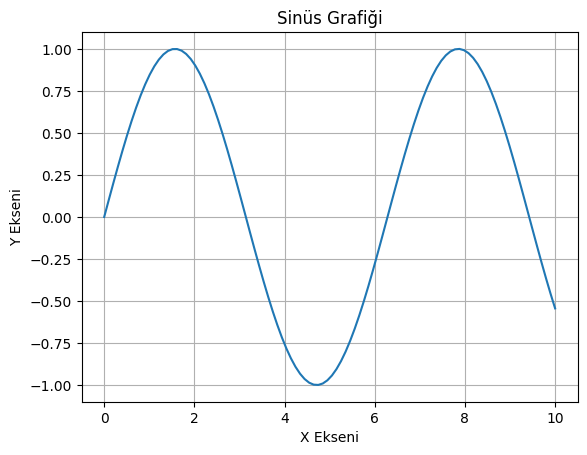

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100) # 0 ile 10 arasında, eşit aralıklı 100 adet sayı üretir

y = np.sin(x)

plt.plot(x, y)
plt.title('Sinüs Grafiği')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.grid(True)
plt.show()

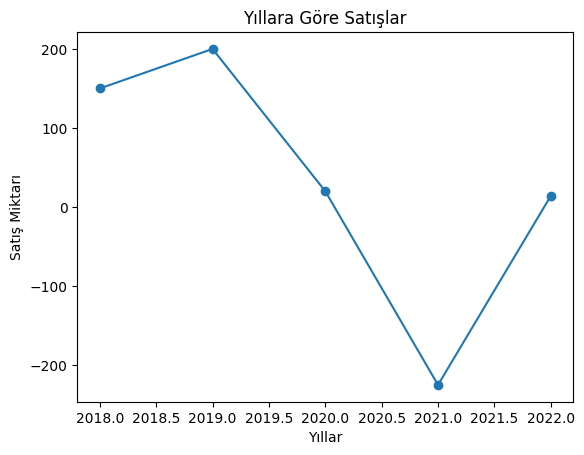

In [13]:
import matplotlib.pyplot as plt

# Yıllara göre satışlar
yillar = [2018, 2019, 2020, 2021, 2022]
satislar = [150, 200, 20, -225, 14]

# Satış grafiğini çiz
plt.plot(yillar, satislar, marker='o')
# Grafik başlıkları
plt.title("Yıllara Göre Satışlar")
plt.xlabel("Yıllar")
plt.ylabel("Satış Miktarı")
# Grafiği göster
plt.show()

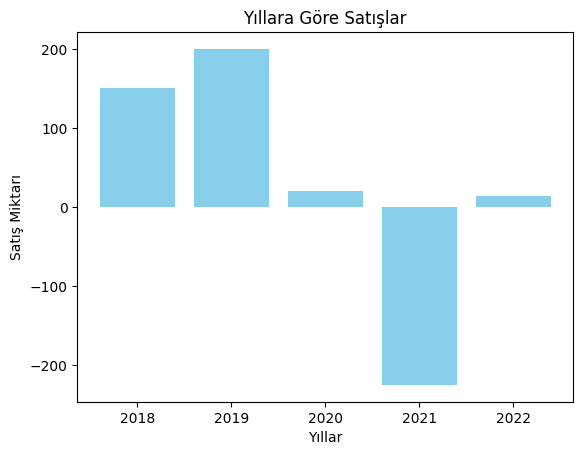

In [14]:
import matplotlib.pyplot as plt

# Yıllara göre satışlar
yillar = [2018, 2019, 2020, 2021, 2022]
satislar = [150, 200, 20, -225, 14]

# Satış grafiğini çiz
plt.bar(yillar, satislar, color='skyblue')

# Grafik başlıkları
plt.title("Yıllara Göre Satışlar")
plt.xlabel("Yıllar")
plt.ylabel("Satış Miktarı")

# Grafiği göster
plt.show()

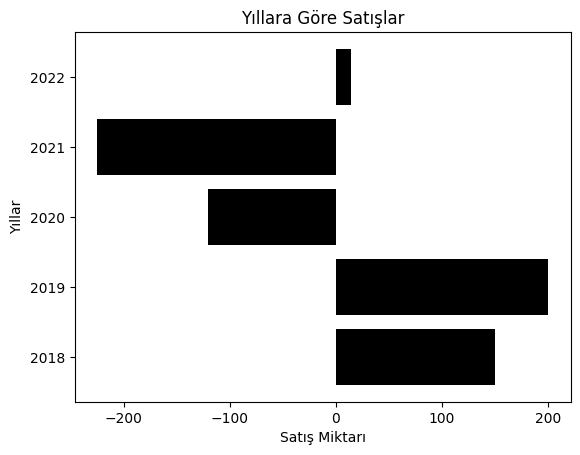

In [16]:
import matplotlib.pyplot as plt

# Yıllara göre satışlar
yillar = [2018, 2019, 2020, 2021, 2022]
satislar = [150, 200, -120, -225, 14]

# Satış grafiğini çiz
plt.barh(yillar, satislar, color='black')

# Grafik başlıkları
plt.title("Yıllara Göre Satışlar")
plt.xlabel("Satış Miktarı")
plt.ylabel("Yıllar")

# Grafiği göster
plt.show()

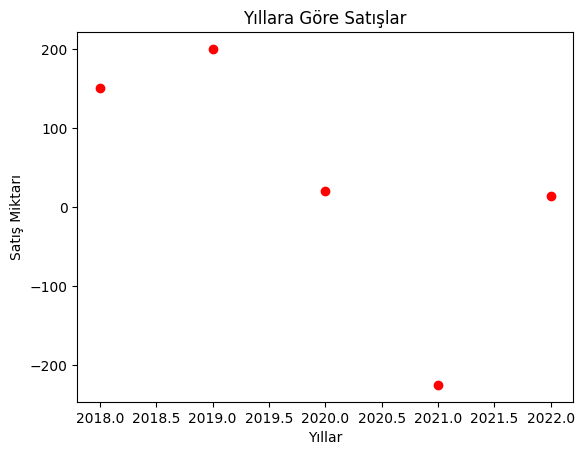

In [17]:
# Yıllara göre satışlar
yillar = [2018, 2019, 2020, 2021, 2022]
satislar = [150, 200, 20, -225, 14]

plt.scatter(yillar, satislar, color='red')
# Grafik başlıkları
plt.title("Yıllara Göre Satışlar")
plt.xlabel("Yıllar")
plt.ylabel("Satış Miktarı")
plt.show()

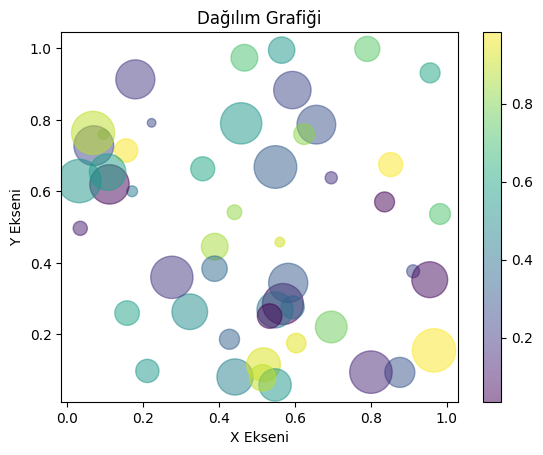

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)
colors = np.random.rand(50)
sizes = 1000 * np.random.rand(50)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.5, cmap='viridis')
plt.title('Dağılım Grafiği')
plt.xlabel('X Ekseni')
plt.ylabel('Y Ekseni')
plt.colorbar()  # Renk skalasını ekler
plt.show()

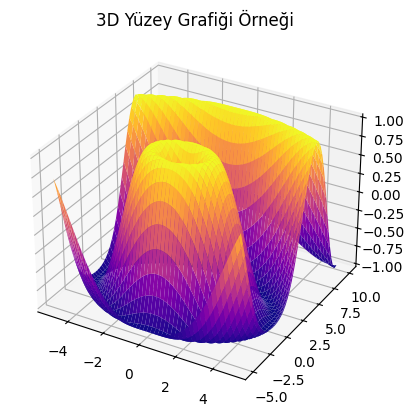

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-5, 5, 100) # -5 ile 5 arasında eşit aralıklı 100 veri noktası oluşturur.
y = np.linspace(-5, 10, 50) # -5 ile 10 arasında eşit aralıklı 50 veri noktası oluşturur.
X, Y = np.meshgrid(x, y) # ızgara şeklini aktif ediyoruz.
Z = np.sin(np.sqrt(X**2 + Y**2)) # X ve Y üzerindeki her nokta için Z koordinatını hesaplar.
# Z değeri, X ve Y'in karelerinin toplamının karekökünün sinüsüdür. Bu, bir yüzey oluşturur.

ax.plot_surface(X, Y, Z, cmap='plasma')

"""
cmap komutu ile yüzey renklendirmesini sağlanır.
bone ile kemik rengi
gray ile gri rengi
ocean ile okyanus suyun mavi ton rengi
plasma ile sıcak renkler
"""

ax.set_title('3D Yüzey Grafiği Örneği')
plt.show()

In [20]:
lower_red = np.array([0, 0, 100]) # alt limit satırı
upper_red = np.array([100, 100, 255]) # üst limit satırı
mask = cv2.inRange(image, lower_red, upper_red)
result = cv2.bitwise_and(image, image, mask=mask)
cv2_imshow(result)

NameError: name 'cv2' is not defined

In [1]:
import os

print("Geçerli Dizin bilgisi: ", os.getcwd())


Geçerli Dizin bilgisi:  /content


In [2]:
klasor_yolu = "/content/drive/MyDrive/VERIYAPILARI_PYTHON"

def dosya_sayisini_bul(klasor_yolu):
  try:
      ogeler = os.listdir(klasor_yolu)

      dosya_sayisi = 0

      for ogeler in ogeler:
        if os.path.isfile(os.path.join(klasor_yolu, ogeler)):
          dosya_sayisi += 1

      return dosya_sayisi

  except FileNotFoundError:
    print("Dosya yolu hatalı")
  except PermissionError:
    print("Bu klasöre erişiminiz yok")

print("Dosya Adedi: ", dosya_sayisini_bul(klasor_yolu))

Dosya yolu hatalı
Dosya Adedi:  None


In [ ]:
import pandas as pd

data = {'Ders': ['Algoritma', 'Bilgisayarda Programlama', 'Elektronik-2', 'Aviyonik Sistemler'],
        'Not': [95, 100, 65, 90]}

df = pd.DataFrame(data)

# En yüksek notu bulma

en_yuksek_not = df['Not'].max()
print("En yüksek not:", en_yuksek_not)

ortalama_not = df['Not'].mean()
print("Ortalama not:", ortalama_not)

print(df.describe())

In [ ]:
ders_no = 4
pi_sayısı = 3.14159
dersin_ismi = ("phyton - veri yapıları ve algoritma ")
# String (str) Veri Türü
durum1 = True
durum2 = False


print(ders_no)
print(pi_sayısı)
print(durum1)
print(durum2)

4
3.14159
True
False


In [ ]:
a = 7
b = 3
print(a+b)

a = 7
b = 3
print("Çarpma:", a * b)
print("Üs alma :", a ** b)
print("Mod:", a % b)



10
Çarpma: 21
Üs alma : 343
Mod: 1


In [ ]:
a = True
b = False
print("a and b :", a and b)
print("a or b :", a or b)
print("not a :", not a)

x = 7
x += 3 # x = x + 3
print(x)

print(7 & 3) # 3
print(7 ^ 3) # 4
print(7 | 3) # 3
print(7 << 3) # 56


a and b : False
a or b : True
not a : False
10
3
4
7
56


Kontrol komutları - if yapısı örnekleri

In [ ]:
a = 10
if a > 0 :
    a=a+1
print(a)

11


In [ ]:
a = 5
b = 4
c = 0
if a > 0 and b > 0:
   c = a * b + b
print(c)

24


In [ ]:
a = 5
b = 4
c = 0
if a > 0 and b > 0 :
  c = a +b
  c = a*a+c
print(c)

34


In [ ]:
a = 4
b = 1
c = 0
if a > b :
  print(a)
else :
  print(b)

4


In [ ]:
a = 4
b = 1
c = 9
sonuc = 0
if a > 0 :
  sonuc += 1
  sonuc = a * c - b
  print(sonuc)
else:
  sonuc -= 1
  sonuc = a / c + b
print(sonuc)


35
35


KONTROL KOMUTLARI  
 If - elif - else yapısı

In [ ]:
If ifadesi:
 #ifade için 'durum1' isimli blok
elif ifadesi:
 # ifadesi için 'durum2' isimli blok
else ifadesi :
  # ifadesi için 'durm3' isimli bloğa bakılır


In [ ]:
değişken = 0
sonuc = 0
if değişken ==1:
  sonuc +=1
  print(sonuc)
elif değişken == 2 :
  sonuc += 2
  print(sonuc)
elif değişken == 3 :
  sonuc +=3
  print(sonuc)
else :
  sonuc = 0
  print(sonuc)

0


1- for döngüsü

In [ ]:
for i in range(1,11):
   print('sayı_listesi', i)

sayı_listesi 1
sayı_listesi 2
sayı_listesi 3
sayı_listesi 4
sayı_listesi 5
sayı_listesi 6
sayı_listesi 7
sayı_listesi 8
sayı_listesi 9
sayı_listesi 10


In [ ]:
for ch in range(ord('A'),ord('Z')+1):
   print('alfabe listesi',chr(ch))

alfabe listesi A
alfabe listesi B
alfabe listesi C
alfabe listesi D
alfabe listesi E
alfabe listesi F
alfabe listesi G
alfabe listesi H
alfabe listesi I
alfabe listesi J
alfabe listesi K
alfabe listesi L
alfabe listesi M
alfabe listesi N
alfabe listesi O
alfabe listesi P
alfabe listesi Q
alfabe listesi R
alfabe listesi S
alfabe listesi T
alfabe listesi U
alfabe listesi V
alfabe listesi W
alfabe listesi X
alfabe listesi Y
alfabe listesi Z


2- while döngüsü

In [ ]:
x = 3
c = 0
while c<3 :
  print('ekran çıktısı',c,x)
  x = x*x
  c = c+1
print('döngü sonu',c,x)

ekran çıktısı 0 3
ekran çıktısı 1 9
ekran çıktısı 2 81
döngü sonu 3 6561


10 ile 100 arasındaki tam kare sayıları ekrana yazdıran program ve akış diyagramı

In [ ]:
sayac = 4

while sayac*sayac <= 1000 :
  print('döngü sonu',sayac*sayac)
  sayac +=1

döngü sonu 16
döngü sonu 25
döngü sonu 36
döngü sonu 49
döngü sonu 64
döngü sonu 81
döngü sonu 100
döngü sonu 121
döngü sonu 144
döngü sonu 169
döngü sonu 196
döngü sonu 225
döngü sonu 256
döngü sonu 289
döngü sonu 324
döngü sonu 361
döngü sonu 400
döngü sonu 441
döngü sonu 484
döngü sonu 529
döngü sonu 576
döngü sonu 625
döngü sonu 676
döngü sonu 729
döngü sonu 784
döngü sonu 841
döngü sonu 900
döngü sonu 961


Girilen sayının 5'in kuvveti olup olmadığını bulan algoritma

In [ ]:
sayı = int(input("bir sayı giriniz="))
if sayı % 5 == 0:
  print("5'in kuvvetidir. ")
else:
  print("5'in kuvveti değildir.")

bir sayı giriniz=35
5'in kuvvetidir. 


Girilen yılın artık yıl olup olmadığını bulan program

In [ ]:
yıl= int(input("Bir yıl giriniz = "))
if yıl % 4 == 0 :
  print("artık yıldır.")
else :
  print("arık yıl değilidir.")


Bir yıl giriniz = 345
arık yıl değilidir.


Klavyeden 0 girilinceye kadar sayı girilmesini sağlayan ve bu sayıların kaç tane olduğunu, sayıların toplam ve oranlarını hesaplayan program

In [ ]:
sayı=1
s=0
toplam=0
while sayı != 0 :
  sayı= int(input("bir sayı girin(0 ila çıkarabilirsiniz):"))
  if sayı != 0 :
    toplam += sayı
    s += sayı
if s == 0:
  print("sayı girişi yapmadınız")
else :
  ort=toplam/1
  print("tane sayı giriniz")
  print(toplam)
  print(ort)

bir sayı girin(0 ila çıkarabilirsiniz):3
bir sayı girin(0 ila çıkarabilirsiniz):0
tane sayı giriniz
3
3.0


In [ ]:

     sayılar = {10,20,30,40,50}
     # toplama hesaplmama
     toplam=sum(sayılar)
     print("toplam",toplam)

     #maksimum ve min değer bulma
     print("en büyük sayı",max("sayılar"))
     print("en küçük sayıyı",min("sayılar"))

toplam 150
en büyük sayı ı
en küçük sayıyı a


In [ ]:
import requests

def hava_durumu_bilgisi_al(sehir, api_anahtari):
    # Doğru URL ve API endpointi (ücretsiz sürüm için)
    base_url = "https://api.openweathermap.org/data/2.5/weather"

    # API'ye gönderilecek parametreler (şehir adı, API anahtarı ve metrik sistem)
    params = {"q": sehir, "appid": api_anahtari, "units": "metric"}

    try:
        # API'ye GET isteği gönderme
        response = requests.get(base_url, params=params)
        response.raise_for_status()  # Hata durumunda isteği durdur

        # Cevaptan JSON verisini alma
        hava_durumu = response.json()

        # JSON verisini işleme örnekleri
        print("Hava Durumu Bilgisi - " + sehir)
        print("Sıcaklık: " + str(hava_durumu['main']['temp']) + " °C")
        print("Nem Oranı: " + str(hava_durumu['main']['humidity']) + "%")
        print("Açıklama: " + hava_durumu['weather'][0]['description'])

    except requests.exceptions.RequestException as err:
        print("Hata oluştu: " + str(err))

if __name__ == "__main__":
    # Kullanıcıdan şehir adı ve API anahtarı alınması
    sehir_adı = input("Hava durumu bilgisini almak istediğiniz şehir adını girin: ")
    api_key = input("OpenWeatherMap API anahtarınızı girin: ") # API KEY sizin OpenWeatherMap üyeliğiniz sonrasında oluşturulan anahtardır.

    # Hava durumu bilgilerini alma fonksiyonunu çağırma
    hava_durumu_bilgisi_al(sehir_adı, api_key)

Hava durumu bilgisini almak istediğiniz şehir adını girin: TUNCELİ
OpenWeatherMap API anahtarınızı girin: A
Hata oluştu: 401 Client Error: Unauthorized for url: https://api.openweathermap.org/data/2.5/weather?q=TUNCEL%C4%B0&appid=A&units=metric
